<a href="https://colab.research.google.com/github/kunal-git-002/pose-estimation/blob/master/pose_estimation_using_caffe_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

***Pose estimation for single person***

> using caffe model

> for simple poses 





more about this project : [https://cv-tricks.com/pose-estimation/using-deep-learning-in-opencv/
](https://cv-tricks.com/pose-estimation/using-deep-learning-in-opencv/)

In [435]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow

In [436]:

BODY_PARTS={"Head": 0, "Neck": 1, "RShoulder": 2, "RElbow": 3, "RWrist": 4,
"LShoulder": 5, "LElbow": 6, "LWrist": 7, "RHip": 8, "RKnee": 9,
"RAnkle": 10, "LHip": 11, "LKnee": 12, "LAnkle": 13, "Chest": 14,
"Background": 15}

POSE_PAIRS = [ ["Head", "Neck"], ["Neck", "RShoulder"], ["RShoulder", "RElbow"],
             ["RElbow", "RWrist"], ["Neck", "LShoulder"], ["LShoulder", "LElbow"],
             ["LElbow", "LWrist"], ["Neck", "Chest"], ["Chest", "RHip"], ["RHip", "RKnee"],
             ["RKnee", "RAnkle"], ["Chest", "LHip"], ["LHip", "LKnee"], ["LKnee", "LAnkle"] ]


 

In [437]:
image1=cv2.imread("/content/drive/My Drive/pose detection/caffe_models/imgs/pose5.jpg")

h,w,c=image1.shape



In [438]:
# Fix the input Height and get the width according to the Aspect Ratio

inHeight = 368

inWidth = int((inHeight/h)*w)


In [439]:
inpBlob = cv2.dnn.blobFromImage(image1,
                                1.0 / 255, 
                                (inWidth, inHeight),
                                (0, 0, 0),
                                swapRB=False, #if true img will converted from bgr to rgb
                                crop=False)


In [440]:
protoFile="/content/drive/My Drive/pose detection/caffe_models/files/pose_deploy_linevec.prototxt.txt"
weightsFile="/content/drive/My Drive/pose detection/caffe_models/files/pose_iter_440000.caffemodel"

net = cv2.dnn.readNetFromCaffe(protoFile, weightsFile)

net.setInput(inpBlob)
out= net.forward()

In [441]:
out.shape

(1, 57, 46, 46)

In [442]:
points=[]
for i in range(len(BODY_PARTS)):

    # Slice heatmap of corresponging body's part.
    heatMap = out[0, i, :, :]


    #find for global min,global max and their index
    _, conf, _, point = cv2.minMaxLoc(heatMap)# return 4 values min val,max val,ind min val,ind max val

    
    x = (w * point[0]) / out.shape[3]#x coordinate of body parts which findede
    y = (h * point[1]) / out.shape[2]#y coordinate of body parts which findede

    #golamethod for inding chest x,y 
    if i==14:
      (x1,y1)=points[1]# neck coordinate
      (x2,y2)=points[2]# right shoulder coordinate

      temp_h=int(abs(x1-x2)/2)

      x=x1
      y=y1+temp_h

      points.append((x,y))



    else:
      # Add a point if it's confidence is higher than threshold.
      #here threshold=0.1
      points.append((int(x), int(y))
       if conf > 0.1 else None)


In [443]:
BODY_PARTS={"Head": 0, "Neck": 1, "RShoulder": 2, "RElbow": 3, "RWrist": 4,
"LShoulder": 5, "LElbow": 6, "LWrist": 7, "RHip": 8, "RKnee": 9,
"RAnkle": 10, "LHip": 11, "LKnee": 12, "LAnkle": 13, "Chest": 14,
"Background": 15}

POSE_PAIRS = [ ["Head", "Neck"], ["Neck", "RShoulder"], ["RShoulder", "RElbow"],
             ["RElbow", "RWrist"], ["Neck", "LShoulder"], ["LShoulder", "LElbow"],
             ["LElbow", "LWrist"], ["Neck", "Chest"], ["Chest", "RHip"], ["RHip", "RKnee"],
             ["RKnee", "RAnkle"], ["Chest", "LHip"], ["LHip", "LKnee"], ["LKnee", "LAnkle"] ]


In [444]:
for pair in POSE_PAIRS:
    part1 = pair[0]
    part2 = pair[1]# this part is coonected with part 1

    #if condition is true nothing happen
    #else raie "Asserting error"
    assert(part1 in BODY_PARTS)
    assert(part2 in BODY_PARTS)
 
    id1 = BODY_PARTS[part1]#(x,y) of part1
    id2 = BODY_PARTS[part2]#(x,y) of part2
    if points[id1] and points[id2]:
        cv2.line(image1, points[id1], points[id2], (255,0,0), 3)
      
        #cv2.ellipse(image1, points[id1], (4, 4), 0, 0, 360, (0,255,0), cv2.FILLED)
        cv2.circle(image1,points[id1],5,(0,255,0),-1)

        #cv2.ellipse(image1, points[id2], (4, 4), 0, 0, 360, (0,0,255), cv2.FILLED)
        cv2.circle(image1,points[id2],5,(0,0,255),-1)

        cv2.putText(image1, str(id1), points[id1], cv2.FONT_HERSHEY_SIMPLEX,2, (0,0,0),2,cv2.LINE_AA)
        cv2.putText(image1, str(id2), points[id2], cv2.FONT_HERSHEY_SIMPLEX,2, (0,255,255),2,cv2.LINE_AA)




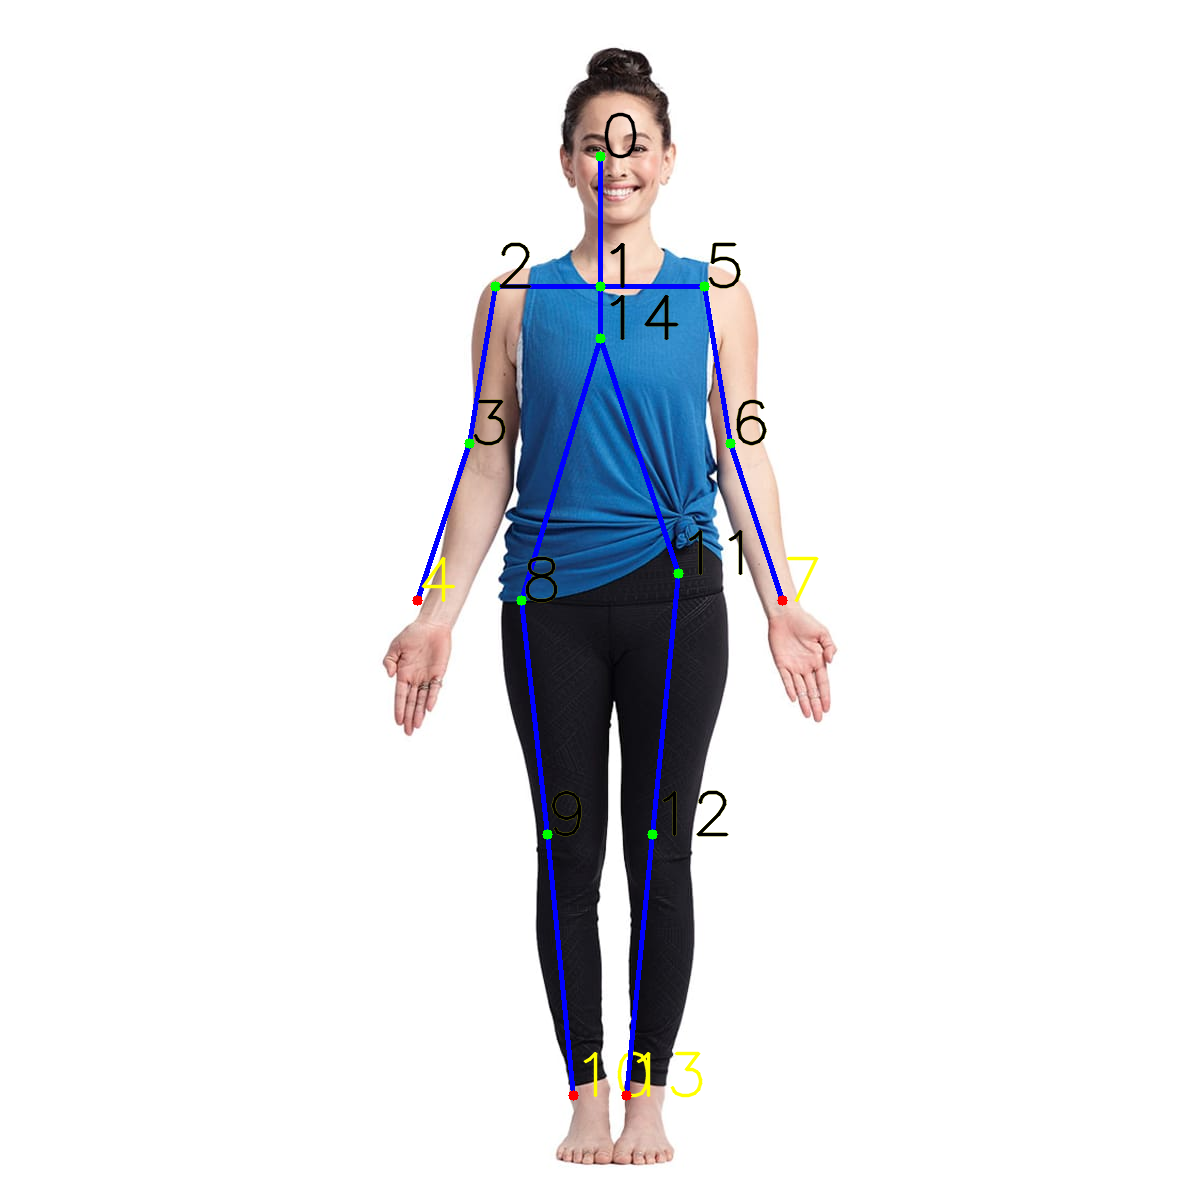

In [445]:
cv2_imshow(image1)

more about "assert"[https://www.w3schools.com/python/ref_keyword_assert.asp#:~:text=The%20assert%20keyword%20lets%20you,False%2C%20check%20the%20example%20below.](https://www.w3schools.com/python/ref_keyword_assert.asp#:~:text=The%20assert%20keyword%20lets%20you,False%2C%20check%20the%20example%20below.)